In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#loading the data
data=pd.read_csv('/content/P587 DATASET.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


#Data Preprocessing and EDA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [4]:
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)
data.sort_index(inplace=True)

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [6]:
#normalizing the data
def norm(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [7]:
data1=norm(data.iloc[:,1:])
data1.index=data.index

In [8]:
#finding null or missing values
data1.isnull().sum()
data1.drop_duplicates()

,High,Low,Close,Adj Close,Volume
Date,,,,,
2012-01-03,0.007780,0.014647,0.012545,0.007663,0.175791
2012-01-04,0.009094,0.014819,0.013884,0.008797,0.146901
2012-01-05,0.011428,0.016896,0.016666,0.011152,0.154601
2012-01-06,0.013961,0.020910,0.019314,0.013394,0.186794
2012-01-09,0.016976,0.022216,0.018908,0.013051,0.238641
...,...,...,...,...,...
2019-12-23,0.958967,0.966753,0.968099,0.968959,0.036370
2019-12-24,0.961669,0.977693,0.969244,0.970073,0.002075
2019-12-26,0.983156,0.985329,0.993170,0.993354,0.032638


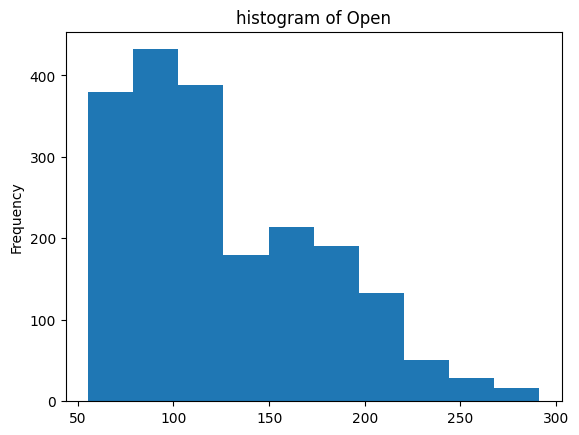

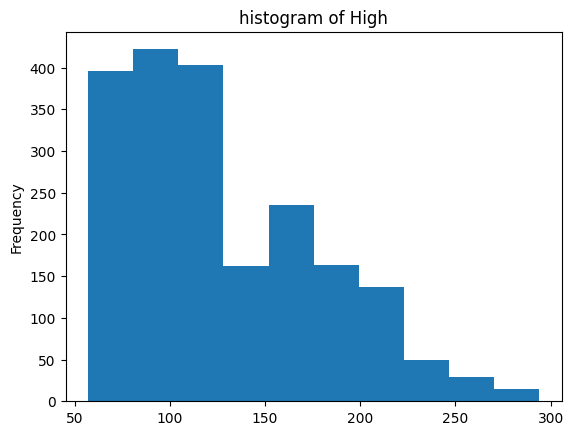

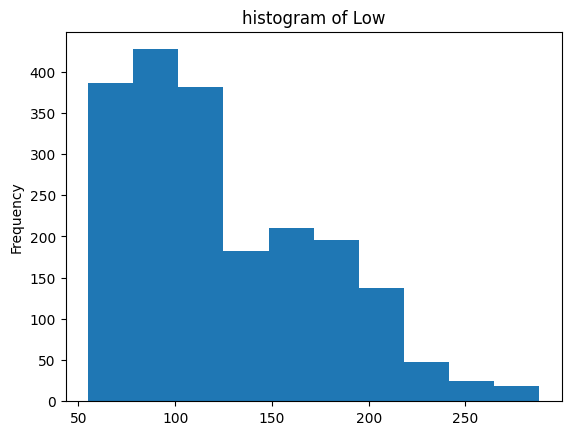

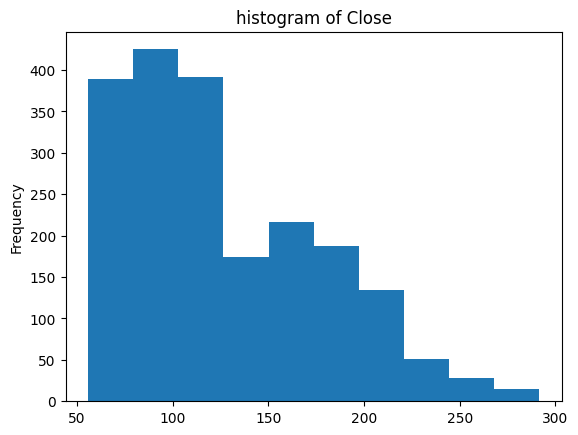

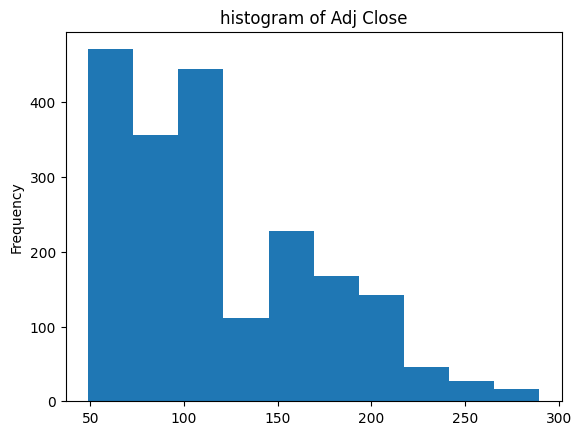

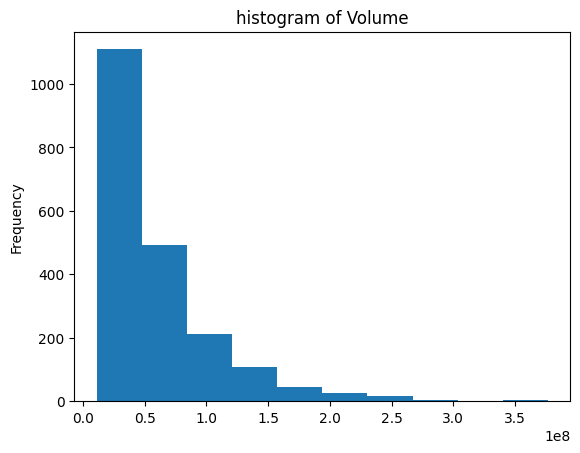

In [9]:
#univarient relation between features
for col in data.select_dtypes(include='number'):
  data[col].plot(kind='hist')
  plt.title(f'histogram of {col}')
  plt.show()

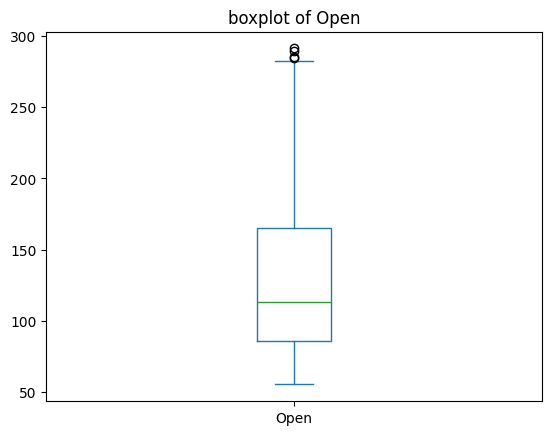

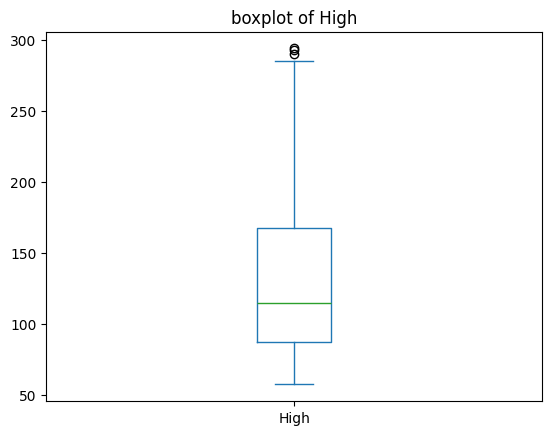

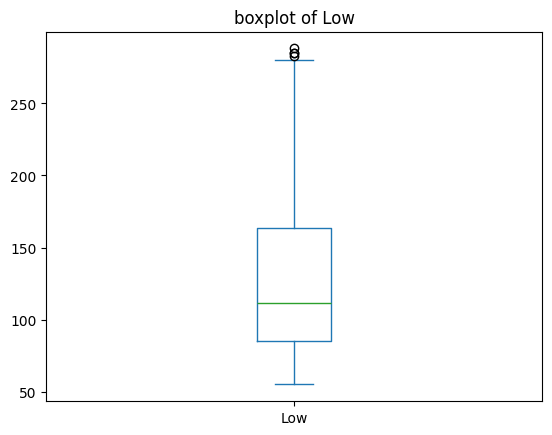

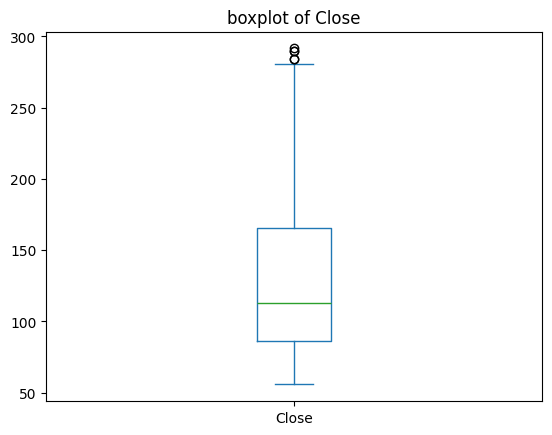

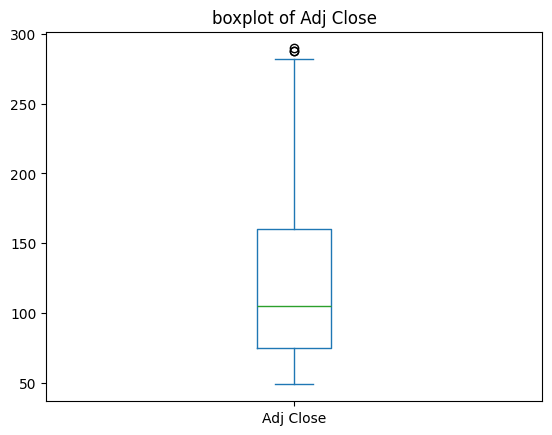

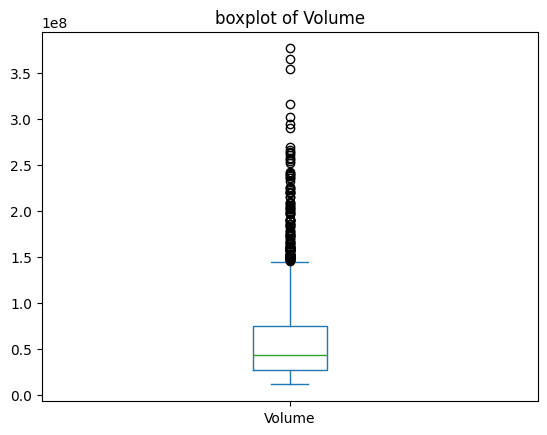

In [10]:
for col in data.select_dtypes(include='number'):
  data[col].plot(kind='box')
  plt.title(f'boxplot of {col}')
  plt.show()

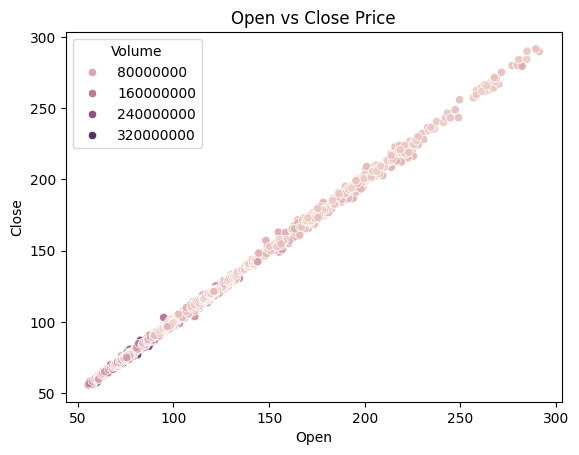

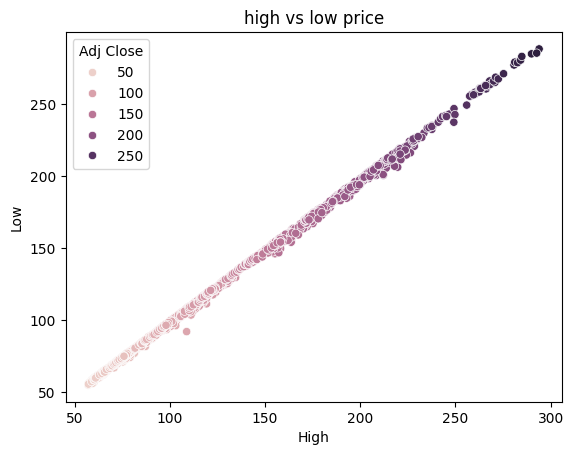

In [11]:
#bivarient relation between features
sns.scatterplot(x='Open', y='Close',hue='Volume', data=data)
plt.title('Open vs Close Price')
plt.show()
sns.scatterplot(x='High',y='Low',hue='Adj Close',data=data)
plt.title('high vs low price')
plt.show()

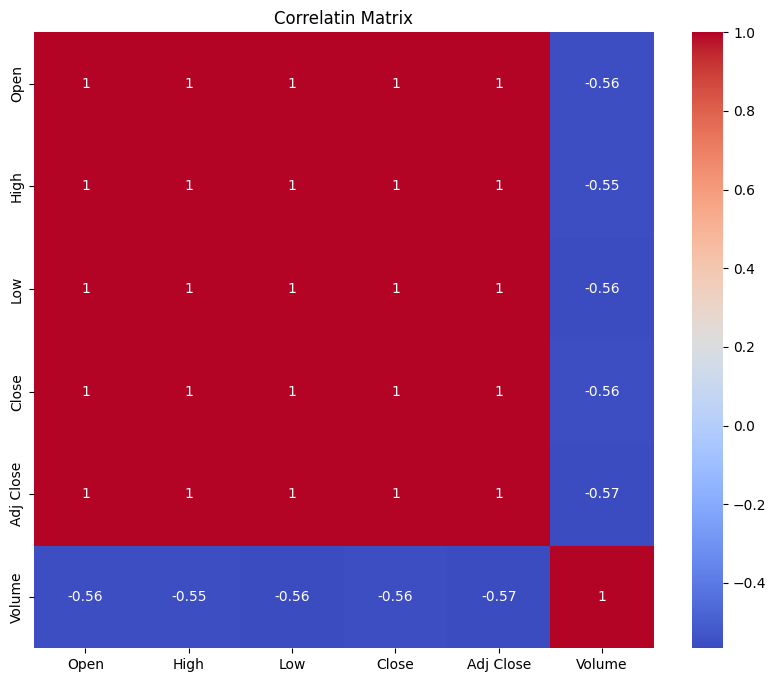

In [12]:
#multivarient relation between features
plt.figure(figsize=(10,8))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
plt.title("Correlatin Matrix")
plt.show()

In [13]:
data1['Daily_Return'] = data1['Close'].pct_change()
data1['Daily_Return'].fillna(0,inplace=True)

/tmp/ipython-input-1672610599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['Daily_Return'].fillna(0,inplace=True)


In [14]:
#feature engineering [moving average and volatility]
data1['MA_10'] = data1['Close'].rolling(window=10).mean()
data1['MA_30'] = data1['Close'].rolling(window=30).mean()
data1['Vol_10'] = data1['Daily_Return'].rolling(window=10).std()

In [15]:
data1['MA_10'].fillna(0,inplace=True)
data1['MA_30'].fillna(0,inplace=True)
data1['Vol_10'].fillna(0,inplace=True)

/tmp/ipython-input-793446265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['MA_10'].fillna(0,inplace=True)
/tmp/ipython-input-793446265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [16]:
data1

,High,Low,Close,Adj Close,Volume,Daily_Return,MA_10,MA_30,Vol_10
Date,,,,,,,,,
2012-01-03,0.007780,0.014647,0.012545,0.007663,0.175791,0.000000,0.000000,0.000000,0.000000
2012-01-04,0.009094,0.014819,0.013884,0.008797,0.146901,0.106764,0.000000,0.000000,0.000000
2012-01-05,0.011428,0.016896,0.016666,0.011152,0.154601,0.200348,0.000000,0.000000,0.000000
2012-01-06,0.013961,0.020910,0.019314,0.013394,0.186794,0.158909,0.000000,0.000000,0.000000
2012-01-09,0.016976,0.022216,0.018908,0.013051,0.238641,-0.021023,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2019-12-23,0.958967,0.966753,0.968099,0.968959,0.036370,0.020389,0.938120,0.903200,0.009175
2019-12-24,0.961669,0.977693,0.969244,0.970073,0.002075,0.001183,0.944818,0.906321,0.009417
2019-12-26,0.983156,0.985329,0.993170,0.993354,0.032638,0.024685,0.952938,0.910273,0.010908


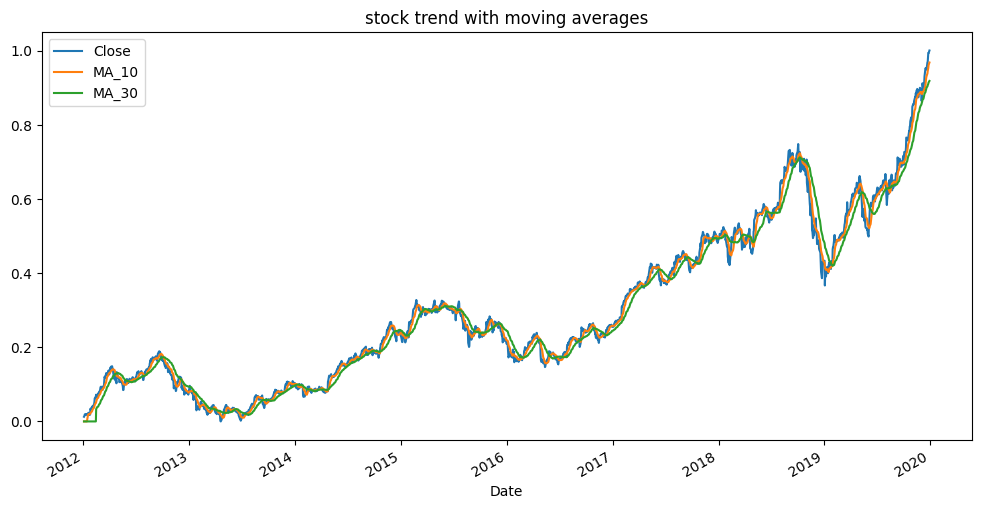

In [17]:
data1[['Close', 'MA_10', 'MA_30']].plot(figsize=(12,6))
plt.title('stock trend with moving averages')
plt.show()

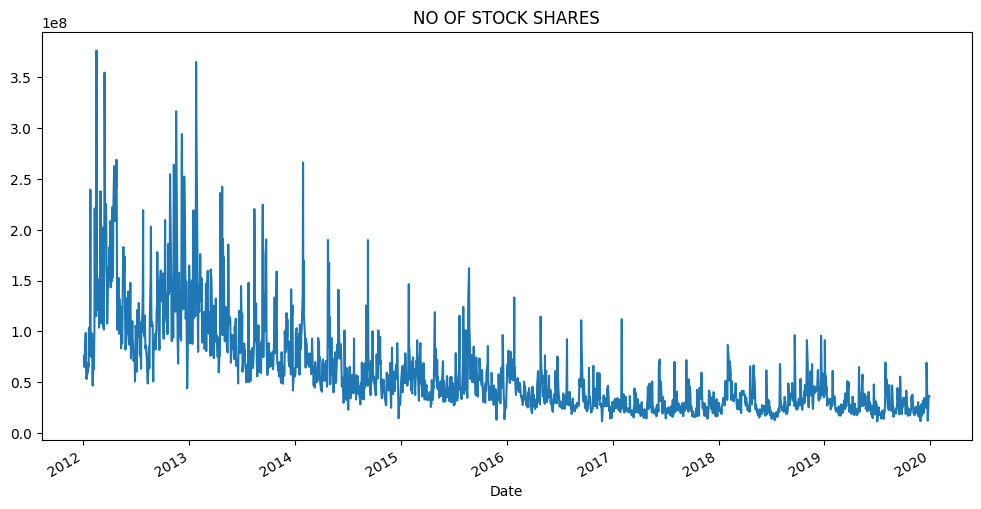

In [18]:
data['Volume'].plot(figsize=(12,6))
plt.title('NO OF STOCK SHARES')
plt.show()

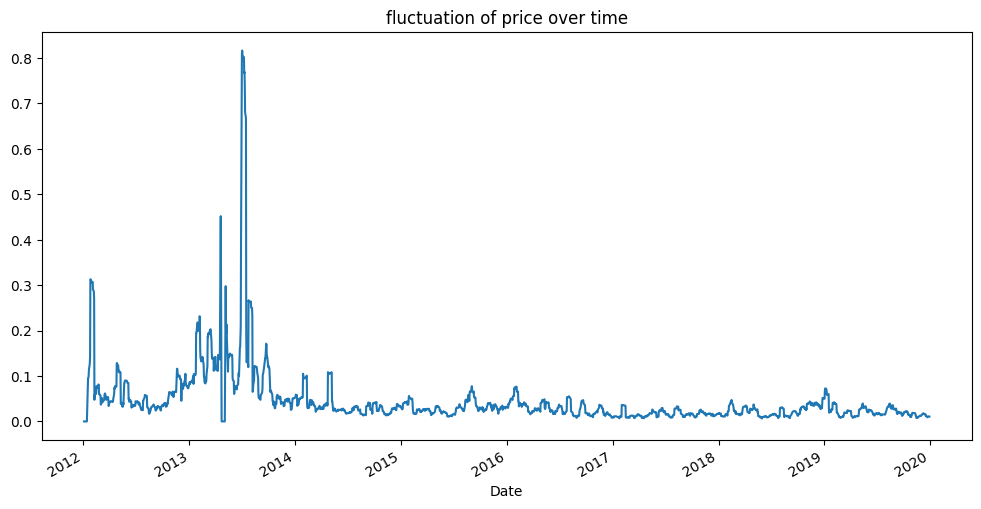

In [19]:
data1['Vol_10'].plot(figsize=(12,6))
plt.title("fluctuation of price over time")
plt.show()

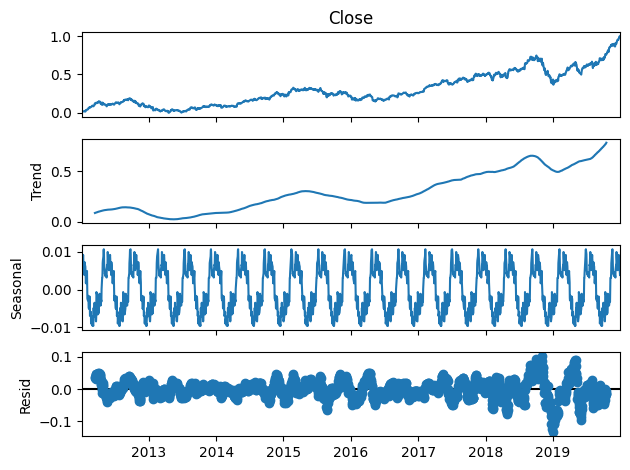

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data1['Close'], model='additive', period=100)
result.plot()
plt.show()

#MODEL BUILDING USING STATISTICAL AND ML METHODS


In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

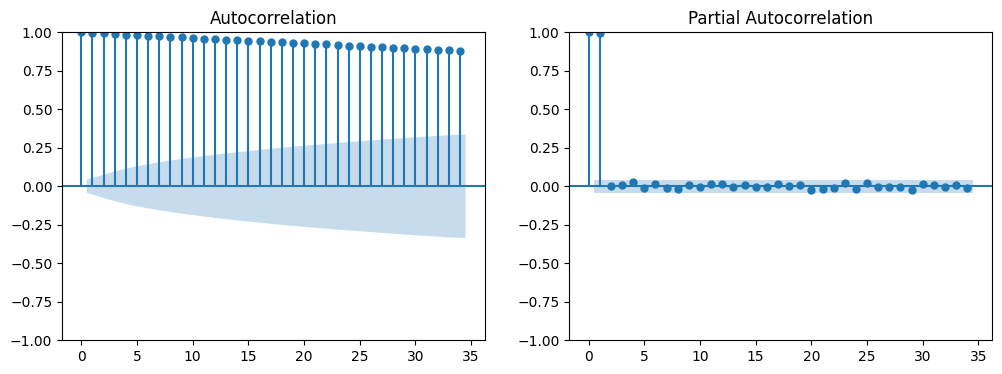

In [22]:
#ACF and PACF plots
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(data['Close'], ax=axes[0])
plot_pacf(data['Close'], ax=axes[1])
plt.show()

In [23]:
#preparing the data
X=data['Close'].astype('float64')
train_size=int(len(X)*0.7)
train, test = X.iloc[:train_size], X.iloc[train_size:]
print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 1407, Test size: 604


In [24]:
def evaluate_arima_model(X, arima_order):
  history=[x for x in train]
  predictions=list()
  for i in range(len(test)):
    model=ARIMA(history, order=arima_order)
    model_fit = model.fit()
    f_cast = model_fit.forecast()[0]
    predictions.append(f_cast)
    history.append(test[i])
  rmse = np.sqrt(mean_squared_error(test, predictions))
  return rmse

In [25]:
def evaluate_models(train, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                rmse = evaluate_arima_model(X, order)
                if rmse < best_score:
                        best_score, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order,rmse))


    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [41]:
p_values = range(0,2)
d_values = range(0,2)
q_values = range(0,1)

evaluate_models(train, p_values, d_values, q_values)

/tmp/ipython-input-276353431.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[i])


ARIMA(0, 0, 0) RMSE=84.396


/tmp/ipython-input-276353431.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[i])


ARIMA(0, 1, 0) RMSE=3.118


/tmp/ipython-input-276353431.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[i])
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 0) RMSE=3.122


/tmp/ipython-input-276353431.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[i])


ARIMA(1, 1, 0) RMSE=3.122
Best ARIMA(0, 1, 0) RMSE=3.118


In [42]:
#using best params and fitting the final model
model2=ARIMA(train,order=(0,1,0))
model_fit=model2.fit()
arima_pred=model_fit.forecast(steps=len(test))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

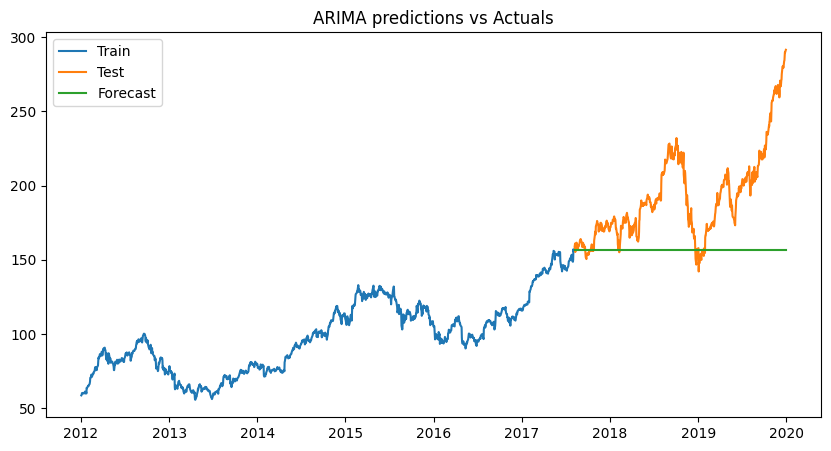

In [43]:
plt.figure(figsize=(10,5))
plt.plot( train, label='Train')
plt.plot( test, label='Test')
plt.plot(test.index, arima_pred, label='Forecast')
plt.legend()
plt.title("ARIMA predictions vs Actuals")
plt.show()

In [35]:
model_sarima = SARIMAX(train, order=(2,1,0), seasonal_order=(1,1,1,12))
model_fit1 = model_sarima.fit()

sarima_pred = model_fit1.forecast(steps=len(test))

rmse_sarima = np.sqrt(mean_squared_error(test, sarima_pred))
print(f"SARIMA RMSE: {rmse_sarima:.3f}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA RMSE: 27.754


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


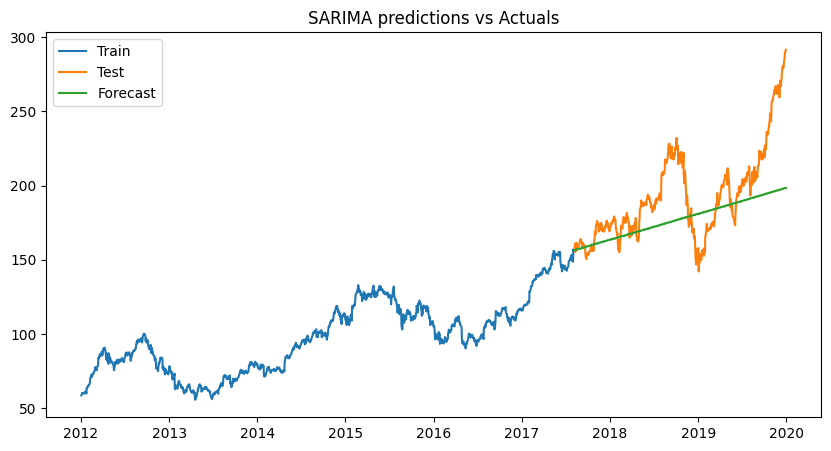

In [36]:
plt.figure(figsize=(10,5))
plt.plot( train, label='Train')
plt.plot( test, label='Test')
plt.plot(test.index, sarima_pred, label='Forecast')
plt.legend()
plt.title("SARIMA predictions vs Actuals")
plt.show()

In [37]:
n_steps=30
forecast = model_fit1.get_forecast(steps=n_steps)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [38]:
predicted_mean = forecast.predicted_mean

In [39]:
predicted_mean

,predicted_mean
1407,156.550535
1408,156.612587
1409,156.752674
1410,156.750395
1411,156.763984
1412,156.949123
1413,157.035747
1414,156.883598
1415,156.966674
1416,157.157952


/tmp/ipython-input-887394189.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=data.index[-1], periods=n_steps+1, freq='M')[1:]


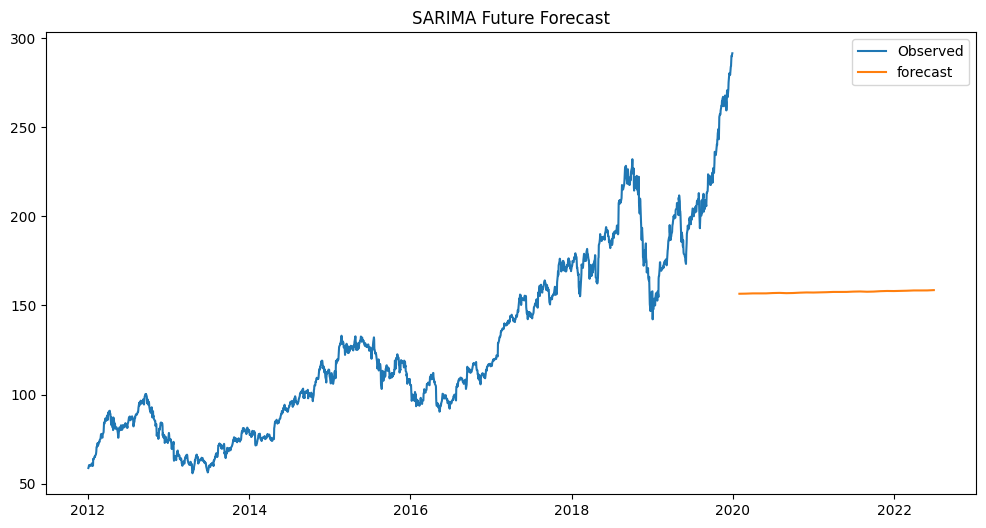

In [40]:
future_index = pd.date_range(start=data.index[-1], periods=n_steps+1, freq='M')[1:]
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Observed')
plt.plot(future_index,predicted_mean,label='forecast')
plt.legend()
plt.title("SARIMA Future Forecast")
plt.show()



```
# This is formatted as code
```

##RANDOM FOREST AND XGBOOST

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

In [30]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [31]:
# Prepare supervised dataset using a 30-day lookback window
# Each sample uses 30 previous closing prices to predict the next day's close
# Split data into 80% training and 20% testing sets


lookback = 30
X_ml, y_ml = [], []
close_vals = data['Close'].values
for i in range(len(close_vals) - lookback):
    X_ml.append(close_vals[i:i+lookback])
    y_ml.append(close_vals[i+lookback])
X_ml, y_ml = np.array(X_ml), np.array(y_ml)
split_ml = int(0.80 * len(X_ml))
X_train_ml, X_test_ml = X_ml[:split_ml], X_ml[split_ml:]
y_train_ml, y_test_ml = y_ml[:split_ml], y_ml[split_ml:]

In [32]:
xgb_model = XGBRegressor(n_estimators=100)
xgb_model.fit(X_train_ml, y_train_ml)
xgb_pred = xgb_model.predict(X_test_ml)
xgb_rmse = np.sqrt(mean_squared_error(y_test_ml, xgb_pred))
print("XGBoost RMSE:", xgb_rmse)

XGBoost RMSE: 34.5400666617745


In [33]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_ml, y_train_ml)
rf_pred = rf.predict(X_test_ml)
rf_rmse = np.sqrt(mean_squared_error(y_test_ml, rf_pred))
print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 32.69938066202608


In [44]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")
    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

In [47]:
# Evaluate all models
eval_arima = evaluate_model(test, arima_pred, "ARIMA")
eval_sarimax = evaluate_model(test, sarima_pred, "SARIMAX")
eval_xgboost = evaluate_model(y_test_ml, xgb_pred, "XGBoost")
eval_rf = evaluate_model(y_test_ml, rf_pred, "Random Forest")


📊 ARIMA Evaluation Metrics:
RMSE: 47.1677
MAE:  36.6665
R²:   -1.4447

📊 SARIMAX Evaluation Metrics:
RMSE: 27.7541
MAE:  20.1511
R²:   0.1536

📊 XGBoost Evaluation Metrics:
RMSE: 34.5401
MAE:  23.9179
R²:   -0.3139

📊 Random Forest Evaluation Metrics:
RMSE: 32.6994
MAE:  22.0109
R²:   -0.1776


,Model,RMSE,MAE,R2
0,ARIMA,47.167651,36.666508,-1.444664
1,SARIMAX,27.754147,20.151084,0.153579
2,XGBoost,34.540067,23.917924,-0.313890
3,Random Forest,32.699381,22.010950,-0.177584


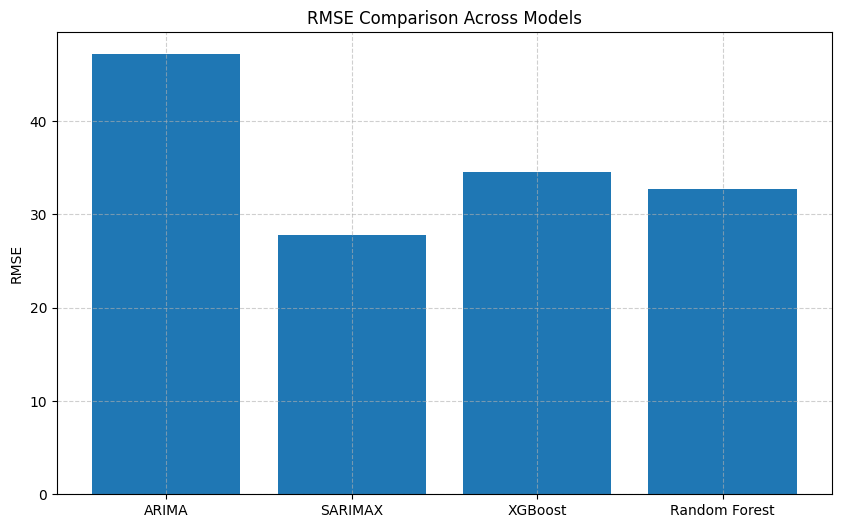

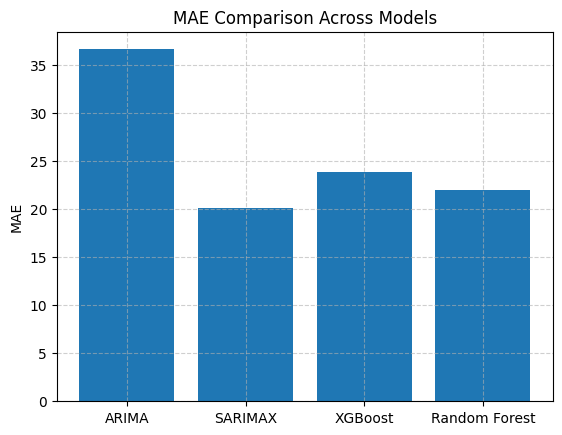

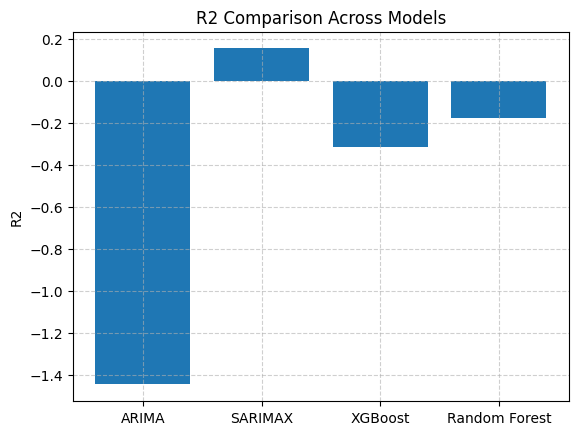

In [48]:
evaluation_df = pd.DataFrame([eval_arima, eval_sarimax, eval_xgboost, eval_rf])
display(evaluation_df)

# Visualization of metrics
plt.figure(figsize=(10, 6))
for metric in ['RMSE', 'MAE', 'R2']:
    plt.bar(evaluation_df['Model'], evaluation_df[metric], label=metric)
    plt.title(f"{metric} Comparison Across Models")
    plt.ylabel(metric)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()